In [1]:
import pickle as pkl
from sintactic import *
from semantic import *
from constituency import *
from mixer import *

In [2]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Constituency test

In [3]:
generator = constituency_graph_generator(model='con-crf-roberta-en')


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
with open('/usrvol/test/graphs/constituency.pkl', 'rb') as f:
    data = pkl.load(f)

In [5]:
data.edges(data=True)

OutEdgeDataView([('S', 'NP0', {}), ('S', 'VP1', {}), ('NP0', 0, {}), ('VP1', 'NP11', {}), ('VP1', 'PP12', {}), ('VP1', 1, {}), ('NP11', 2, {}), ('PP12', 'NP121', {}), ('PP12', 3, {}), ('NP121', 4, {}), ('NP121', 5, {})])

In [6]:
data.nodes(data=True)

NodeDataView({'S': {'label': 'Sentence'}, 'NP0': {'label': 'Noun Phrase'}, 0: {'word': 'I'}, 'VP1': {'label': 'Verb Phrase'}, 1: {'word': 'saw'}, 'NP11': {'label': 'Noun Phrase'}, 2: {'word': 'Sarah'}, 'PP12': {'label': 'Prepositional Phrase'}, 3: {'word': 'with'}, 'NP121': {'label': 'Noun Phrase'}, 4: {'word': 'a'}, 5: {'word': 'telescope.'}})

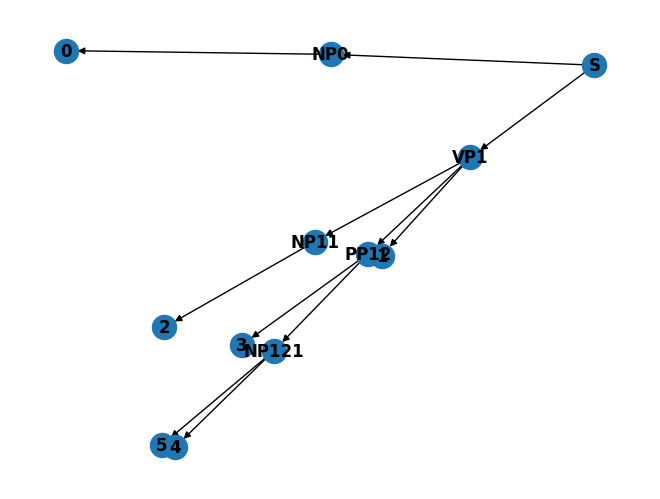

In [7]:
generator.draw_graph(data)

# Semantic test

In [3]:
generator = semantic_graph_generator(model='sdp-vi-en')


In [4]:
with open('/usrvol/test/graphs/semantic.pkl', 'rb') as f:
    data = pkl.load(f)

In [5]:
data.edges(data=True)

OutEdgeDataView([(2, 1, {'label': 'ARG1'}), (2, 2, {'label': 'ARG1'}), (2, 3, {'label': 'ARG2'})])

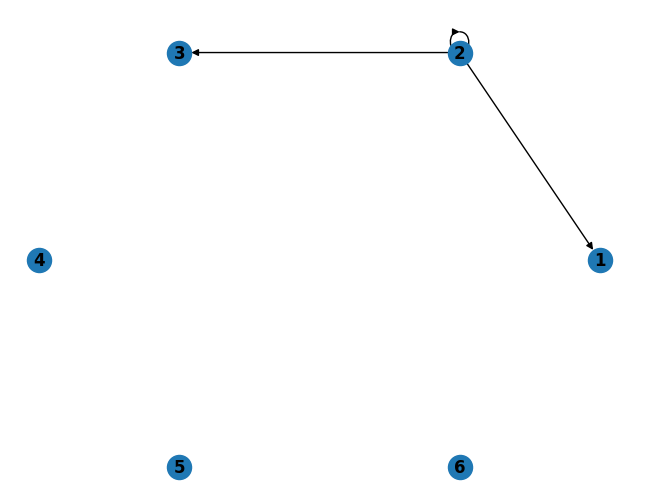

In [6]:
generator.draw_graph(data)

# Sintactic test

In [3]:
generator = sintactic_graph_generator(model='dep-biaffine-roberta-en')

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
with open('/usrvol/test/graphs/sintactic.pkl', 'rb') as f:
    data = pkl.load(f)

In [5]:
data.edges(data=True)

OutEdgeDataView([(2, 1, {'label': 'nsubj'}), (2, 3, {'label': 'dobj'}), (2, 4, {'label': 'prep'}), (4, 6, {'label': 'pobj'}), (6, 5, {'label': 'det'})])

In [6]:
data.nodes(data=True)

NodeDataView({1: {'word': 'I'}, 2: {'word': 'saw'}, 3: {'word': 'Sarah'}, 4: {'word': 'with'}, 5: {'word': 'a'}, 6: {'word': 'telescope.'}})

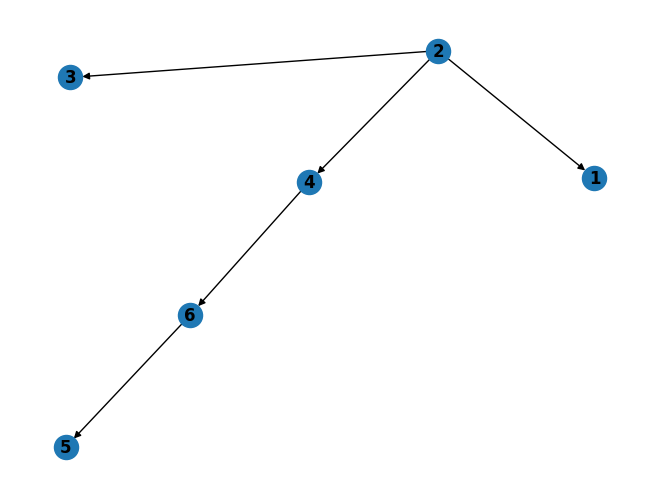

In [5]:
generator.draw_graph(data)

# Mixer

In [2]:
graph_list = []

with open('/usrvol/test/graphs/sintactic.pkl', 'rb') as f:
    graph_list.append(pkl.load(f))

with open('/usrvol/test/graphs/semantic.pkl', 'rb') as f:
    graph_list.append(pkl.load(f))

with open('/usrvol/test/graphs/constituency.pkl', 'rb') as f:
    graph_list.append(pkl.load(f))

In [3]:
mixer =GraphMixer()

In [4]:
merged_graph = mixer.mix(graph_list, 
                         sintactic=True, 
                         semantic=True, 
                         constituency=True)

AttributeError: 'str' object has no attribute 'append'

In [6]:
merged_graph.nodes(data=True)

NodeDataView({})